<a href="https://colab.research.google.com/github/umeshnandargi/Pytorch/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [38]:
# Model class that inherits nn.Module

class Model(nn.Module):
# Input layer --> 4
# Hidden laye 1
# Hidden laye 2
# Output layer --> 3
  def __init__(self, input_features = 4,h1 = 8, h2=8, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(input_features, h1) #fc = Fully COnnected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.tanh(self.fc1(x))
    x = F.tanh(self.fc2(x))
    x = self.out(x)

    return x


In [39]:
torch.manual_seed(50)
model = Model()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [42]:
#Change last column from string to float

df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)

/tmp/ipython-input-2506004008.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2.0)


In [43]:
X = df.drop('species', axis=1).values
y = df.species.values


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [46]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [47]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
epochs = 200
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = lossfn(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 ==0:
    print(f'Epoch : {i} and loss: {loss:.5f}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0 and loss: 1.11721
Epoch : 10 and loss: 0.87834
Epoch : 20 and loss: 0.59123
Epoch : 30 and loss: 0.39600
Epoch : 40 and loss: 0.25446
Epoch : 50 and loss: 0.15143
Epoch : 60 and loss: 0.09795
Epoch : 70 and loss: 0.07495
Epoch : 80 and loss: 0.06400
Epoch : 90 and loss: 0.05792
Epoch : 100 and loss: 0.05412
Epoch : 110 and loss: 0.05155
Epoch : 120 and loss: 0.04970
Epoch : 130 and loss: 0.04827
Epoch : 140 and loss: 0.04713
Epoch : 150 and loss: 0.04617
Epoch : 160 and loss: 0.04535
Epoch : 170 and loss: 0.04462
Epoch : 180 and loss: 0.04411
Epoch : 190 and loss: 0.04346


Text(0.5, 0, 'epochs')

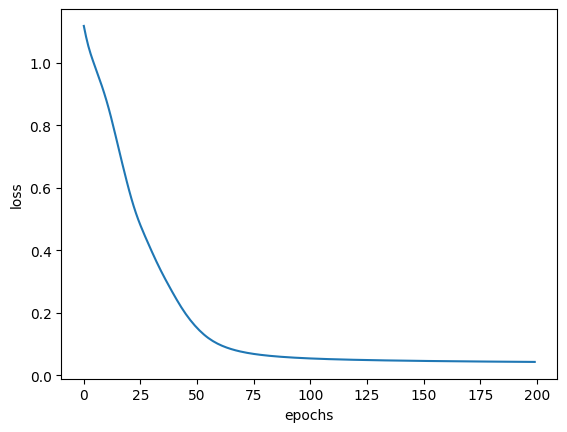

In [49]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")

In [50]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = lossfn(y_eval, y_test)


In [51]:
loss

tensor(0.1902)

In [52]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val) } \t {y_test[i]} \t {y_val.argmax().item()}')


    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'{correct} Correct preds!!')

1.) tensor([-0.5334,  5.9510, -1.3055]) 	 1 	 1
2.) tensor([-4.1629,  1.4811,  3.6995]) 	 1 	 2
3.) tensor([ 5.1691, -0.6617, -5.2011]) 	 0 	 0
4.) tensor([ 5.1919, -0.6909, -5.2157]) 	 0 	 0
5.) tensor([-4.8639,  0.5621,  4.6036]) 	 2 	 2
6.) tensor([-5.1785,  0.1725,  4.9972]) 	 2 	 2
7.) tensor([-5.1268,  0.2331,  4.9360]) 	 2 	 2
8.) tensor([ 5.1158, -0.5928, -5.1671]) 	 0 	 0
9.) tensor([ 5.1733, -0.6674, -5.2037]) 	 0 	 0
10.) tensor([-4.2073,  1.4392,  3.7357]) 	 1 	 2
11.) tensor([ 5.1782, -0.6734, -5.2069]) 	 0 	 0
12.) tensor([-5.1573,  0.1976,  4.9725]) 	 2 	 2
13.) tensor([ 5.1717, -0.6652, -5.2027]) 	 0 	 0
14.) tensor([-5.0768,  0.2955,  4.8718]) 	 2 	 2
15.) tensor([-1.1927,  5.4720, -0.4429]) 	 1 	 1
16.) tensor([ 5.1500, -0.6375, -5.1887]) 	 0 	 0
17.) tensor([-0.5486,  5.9635, -1.2949]) 	 1 	 1
18.) tensor([ 5.1877, -0.6855, -5.2130]) 	 0 	 0
19.) tensor([-0.4768,  5.9353, -1.3653]) 	 1 	 1
20.) tensor([-3.4432,  2.4689,  2.7012]) 	 1 	 2
21.) tensor([-5.1944,  0.1521

In [53]:
# Save our Neural Network


torch.save(model.state_dict(), 'my_iris_model')

In [56]:
saved_model = Model()
saved_model.load_state_dict(torch.load('my_iris_model'))

<All keys matched successfully>

In [58]:
saved_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)